<a href="https://colab.research.google.com/github/aksnd/kaggle_dacon_projects/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/stock%20project/stock_price_prediction_ownloss_0415_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance

# 여러가지 회사의 주가 data 불러오기

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year -2, end.month, end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end) #일종의 변수 만드는 방식

#결과적으로 AAPL, GOOG, MSFT,AMZN이라는 변수에 다운받은 값이 들어가게됨

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE","MICROSOFT","AMAZON"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-18,163.919998,166.600006,163.570007,165.070007,163.204956,69023900,APPLE
2022-04-19,165.020004,167.820007,163.910004,167.399994,165.508591,67723800,APPLE
2022-04-20,168.759995,168.880005,166.100006,167.229996,165.340546,67929800,APPLE
2022-04-21,168.910004,171.529999,165.910004,166.419998,164.539688,87227800,APPLE
2022-04-22,166.460007,167.869995,161.500000,161.789993,159.961990,84882400,APPLE
2022-04-25,161.119995,163.169998,158.460007,162.880005,161.039673,96046400,APPLE
2022-04-26,162.250000,162.339996,156.720001,156.800003,155.028366,95623200,APPLE
2022-04-27,155.910004,159.789993,155.380005,156.570007,154.800980,88063200,APPLE
2022-04-28,159.250000,164.520004,158.929993,163.639999,161.791107,130216800,APPLE


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,165.145200,166.909460,163.553460,165.319600,164.510716,6.905318e+07
std,18.729476,18.410369,18.961580,18.694445,19.000761,2.420478e+07
min,126.010002,127.769997,124.169998,125.019997,124.166641,2.404830e+07
25%,148.867496,150.904999,147.220005,149.322506,148.110767,5.182372e+07
50%,168.415001,169.144997,166.449997,167.550003,166.509476,6.437015e+07
75%,180.719997,182.257496,178.655003,180.720005,180.239227,8.026252e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2022-04-18 to 2024-04-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          500 non-null    float64
 1   High          500 non-null    float64
 2   Low           500 non-null    float64
 3   Close         500 non-null    float64
 4   Adj Close     500 non-null    float64
 5   Volume        500 non-null    int64  
 6   company_name  500 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.2+ KB


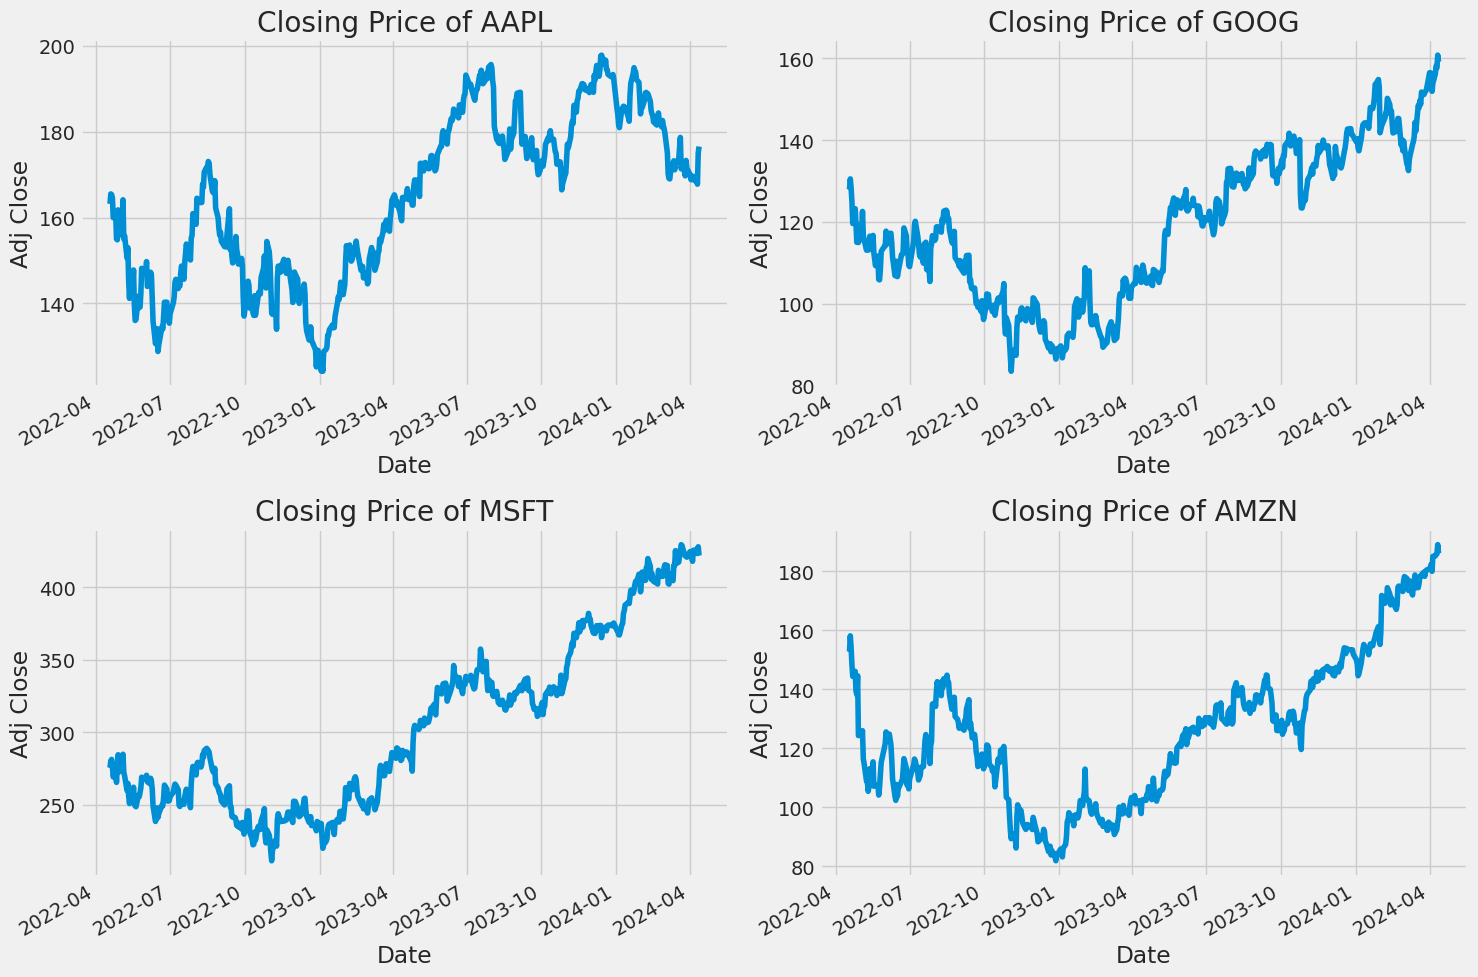

In [ ]:
plt.figure(figsize= (15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2 ,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

# 국내 주요 대기업 주식데이터 AI 기반 가공

In [ ]:
# Define the ticker symbol(s) of the asset(s) you want to retrieve data for

# Specify the start and end dates for the data retrieval
company_num = 8
company_list = ['005930.KS','000660.KS','005380.KS','005490.KS','035420.KS','006400.KS','035720.KS','066570.KS']
company_name = ['삼성전자','SK하이닉스','현대차','POSCO홀딩스','네이버','삼성SDI','카카오','LG전자']

end = datetime.now()
df_list = []
data_list = []
dataset_list = []
# Retrieve the historical market data from Yahoo Finance
for i in range(company_num):
    df = pdr.get_data_yahoo(company_list[i],start='2014-01-01', end=datetime.now())
    df_list.append(df)
    data_list.append(df.filter(['Close']))
    dataset_list.append(df.filter(['Close']).values)
print(df_list[0].head())
print("")
print(data_list[0].head())
print("")
for i in range(company_num):
    print(len(dataset_list[i]))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2014-01-02  26960.0  27100.0  26040.0  26180.0  20706.408203  31025000
2014-01-03  26000.0  26220.0  25740.0  25920.0  20500.765625  26496600
2014-01-06  26060.0  26400.0  25920.0  26140.0  20674.769531  19735800
2014-01-07  26000.0  26360.0  25900.0  26080.0  20627.308594  19763200
2014-01-08  26000.0  26080.0  25740.0  25820.0  20421.669922  20474650

              Close
Date               
2014-01-02  26180.0
2014-01-03  25920.0
2014-01-06  26140.0
2014-01-07  26080.0
2014-01-08  25820.0

2526
2526
2526
2526
2526
2526
2526
2526


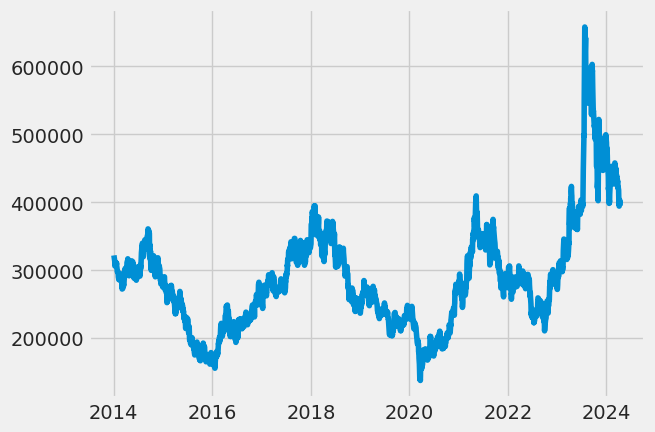

In [ ]:
plt.plot(df_list[3]['Close'])
plt.show()

In [ ]:
# Create the training data set
# Create the scaled training data set
training_data_len = int(np.ceil(len(dataset_list[0])*0.95))

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

training_dates = 80
check_date_interval = 1
total_dates = training_dates+check_date_interval
for i in range(company_num):
    train_data = dataset_list[i][0:int(training_data_len), :]
    for j in range(total_dates, len(train_data)): #앞 traing_dates(60)개를 통해 다음걸 예측하라
        x_train.append(train_data[j-total_dates:j-check_date_interval, 0])
        y_train.append(train_data[j, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))
# x_train.shape
print(x_train.shape)
print(y_train.shape)

(18552, 80)
(18552, 80, 1)
(18552, 1)


In [ ]:
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_train = torch.from_numpy(x_train).type(torch.Tensor).to(device)
y_train = torch.from_numpy(y_train).type(torch.Tensor).to(device)

In [ ]:
x_train[:,-1,:].shape

torch.Size([18552, 1])

# 모델링 및 학습

In [ ]:
input_size = 1
hidden_size = 256
num_layers = 20
num_linear_layers=20
output_size =1

class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers,num_linear_layers, output_size):
      super(LSTMModel, self).__init__()
      self.hidden_size = hidden_size
      self.num_layers = num_layers

      # Define the LSTM layer
      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
      #batch_first 가 true일때 입력값은 batch, seq, feature로
      #feature는 1(특성 1개임), seq는 60(특성한개의 크기)

      # Define the fully connected layer
      self.linear_stack = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_linear_layers)])
      self.fc1 = nn.Linear(hidden_size,output_size)
  def forward(self, x):
      # Initialize hidden state with zeros
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

      # Initialize cell state with zeros
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

      # Forward propagate LSTM
      out, _ = self.lstm(x, (h0, c0))  # out shape: (batch_size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      for linear_layer in self.linear_stack:
            out = linear_layer(out)
            out = torch.relu(out)

      out = self.fc1(out[:, -1, :])
      #중간차원이 날아가 torch([hidden_size,1])을 self.fc에 넣게됨
      return out


In [ ]:
model = LSTMModel(input_size=input_size, hidden_size=hidden_size,
                  num_layers=num_layers,num_linear_layers=num_linear_layers, output_size=output_size).to(device)

loss_fn = torch.nn.L1Loss().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
print(model)


LSTMModel(
  (lstm): LSTM(1, 256, num_layers=20, batch_first=True)
  (linear_stack): ModuleList(
    (0-19): 20 x Linear(in_features=256, out_features=256, bias=True)
  )
  (fc1): Linear(in_features=256, out_features=1, bias=True)
)


In [ ]:
x_train.shape

torch.Size([18552, 80, 1])

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Example data (replace this with your actual data)
# Assuming you have input tensors X and target tensors y

# Create a TensorDataset from your input tensors
dataset = TensorDataset(x_train, y_train)

# Specify the batch size
batch_size = 64

# Create a DataLoader with the specified batch size
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [ ]:
num_epochs = 1000
hist = np.zeros(num_epochs)



for epoch in range(num_epochs):
    loss_sum = 0
    loss_num = 0
    y_train_pred = np.empty((0, 1))
    for batch_x, batch_y in data_loader:
        # Forward pass
        y_train_i = model(batch_x)

        # Compute loss
        loss = loss_fn(y_train_i,(batch_y - batch_x[:,-1,:])/batch_x[:,-1,:]).to(device)
        y_train_pred = np.concatenate((y_train_pred, y_train_i.cpu().detach().numpy()), axis=0)
        # Backward pass and update parameters
        loss_num+=1
        loss_sum+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    hist[epoch] = loss_sum/loss_num
    if(epoch%10==0):
        print("Epoch ", epoch, "loss", loss_sum/loss_num)




KeyboardInterrupt: 

# TEST DATA 확인

In [ ]:
#코드 구조상 train_data확인은 마지막 기업으로 하는게 편함

test_data = dataset_list[company_num-1][int(training_data_len)-total_dates: , :]

x_test = []
y_test = []

for i in range(total_dates, len(test_data)): #앞 60개를 통해 다음걸 예측하라
    x_test.append(test_data[i-total_dates:i-check_date_interval, 0])
    y_test.append(test_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the data
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))
# x_train.shape
print(x_test.shape)

x_test = torch.from_numpy(x_test).type(torch.Tensor).to(device)
y_test = torch.from_numpy(y_test).type(torch.Tensor).to(device)
print(x_test.shape)

(126, 80)
(126, 80, 1)
torch.Size([126, 80, 1])


In [ ]:
import math
from sklearn.metrics import mean_squared_error
# make predictions
y_test_pred = model(x_test)

buy_price_train = (x_train.cpu()[:,-1,:].detach().numpy())
y_train = (y_train.cpu().detach().numpy())
buy_price_test = (x_test.cpu()[:,-1,:].detach().numpy())
y_test_pred = (y_test_pred.cpu().detach().numpy())
y_test = (y_test.cpu().detach().numpy())



y_train_earn_percent = (y_train - buy_price_train) / buy_price_train
y_test_earn_percent = (y_test - buy_price_test) / buy_price_test

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(y_train_earn_percent, y_train_pred))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_earn_percent, y_test_pred))
print('Test Score: %.4f RMSE' % (testScore))

Train Score: 0.0438 RMSE
Test Score: 0.0295 RMSE


2317


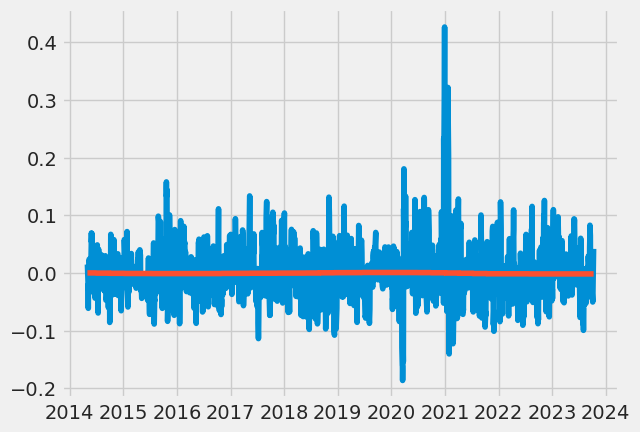

In [ ]:
one_company_data_len = len(data_list[company_num-1][total_dates:training_data_len].index.to_numpy())
print(one_company_data_len)
plt.plot(data_list[company_num-1][total_dates:training_data_len].index.to_numpy(),y_train_earn_percent[-one_company_data_len:,:])
plt.plot(data_list[company_num-1][total_dates:training_data_len].index.to_numpy(),y_train_pred[-one_company_data_len:,:])

# 실제 주가 기반 매수, 매도 포인트 확인 (train data)


/tmp/ipykernel_34/2908202165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Predictions'] = y_train_pred[-one_company_data_len:,:]
/tmp/ipykernel_34/2908202165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_test_pred
/tmp/ipykernel_34/2908202165.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

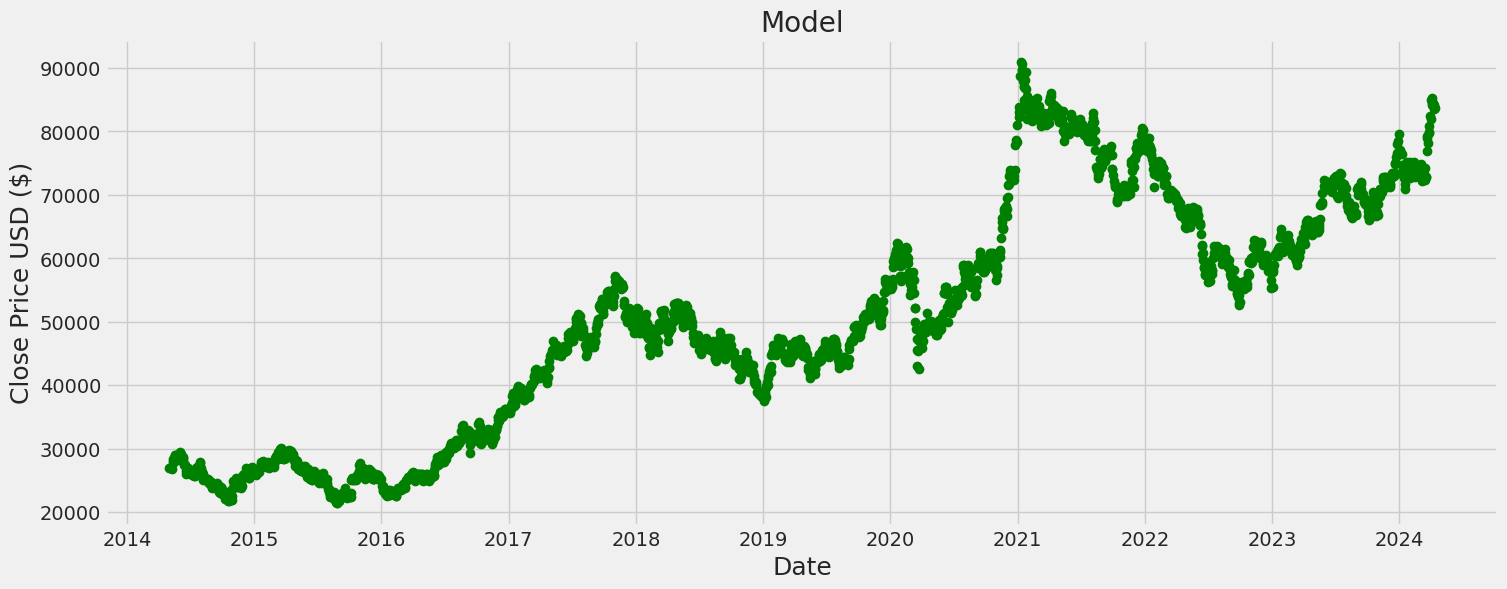

In [ ]:
# Plot the data
train = data[total_dates:training_data_len]
valid = data[training_data_len:]

train['Predictions'] = y_train_pred[-one_company_data_len:,:]
valid['Predictions'] = y_test_pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

for i in range(len(train['Close'])):
  if train['Predictions'][i] > 0.02:
        plt.plot(train.index.to_numpy()[i], train['Close'][i], 'ro')  # Plot red if B > 0.5
  elif train['Predictions'][i] > -0.02:
        plt.plot(train.index.to_numpy()[i], train['Close'][i], 'go')  # Plot red if B > 0.5
  else:
        plt.plot(train.index.to_numpy()[i], train['Close'][i], 'bo')  # Plot blue if B <= 0.5

for i in range(len(valid['Close'])):
  if valid['Predictions'][i] > 0.02:
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'ro')  # Plot red if B > 0.5
  elif valid['Predictions'][i] > -0.02:
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'go')  # Plot red if B > 0.5
  else:
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'bo')  # Plot blue if B <= 0.5
#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.show()

#함수 꼬라지 보니까 %계수로 계산할수 있게 loss함수 바꿔야할듯

# 해당 AI code로 타 회사 돌려보기

In [ ]:
test_company = '034730.KS'
test_company_name = 'LG'

df_test = pdr.get_data_yahoo(test_company,start='2014-01-01', end=datetime.now())

data_test = df_test.filter(['Close'])
dataset_test = data_test.values

x_test = []
y_test = []

for i in range(total_dates, len(dataset_test)): #앞 예측하는 날짜 80개를 통해 다음 5일후 주가를 예측하라
    x_test.append(dataset_test[i-total_dates:i-check_date_interval, 0])
    y_test.append(dataset_test[i, 0])

# Convert the x_train and y_train to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the data
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))
# x_train.shape
print(x_test.shape)

x_test = torch.from_numpy(x_test).type(torch.Tensor).to(device)
y_test = torch.from_numpy(y_test).type(torch.Tensor).to(device)
print(x_test.shape)


y_test_pred = model(x_test)

buy_price_test = (x_test.cpu()[:,-1,:].detach().numpy())
y_test_pred = (y_test_pred.cpu().detach().numpy())
y_test = (y_test.cpu().detach().numpy())

y_test_earn = (y_test - buy_price_test)

# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(y_test_earn, y_test_pred))
print('Test Score: %.4f RMSE' % (testScore))

[*********************100%%**********************]  1 of 1 completed


(2443, 80)
(2443, 80, 1)
torch.Size([2443, 80, 1])
Test Score: 10118.8936 RMSE


/tmp/ipykernel_34/3869155010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_test_pred
/tmp/ipykernel_34/3869155010.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if valid['Predictions'][i] > 0.02: # 5% 이상 이익 예상
/tmp/ipykernel_34/3869155010.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif valid['Predictions'][i] > -0.02: # 5%이상 손실 예상


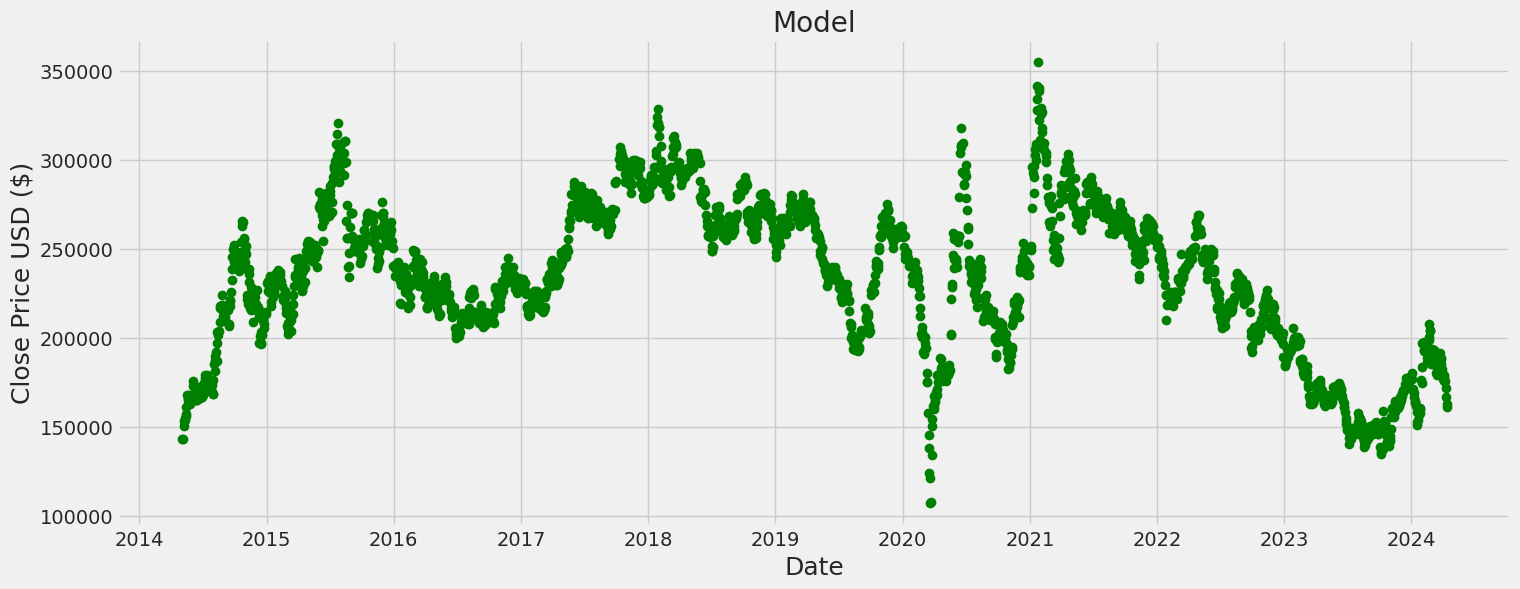

In [ ]:
# Plot the data
valid = data_test[total_dates:]

valid['Predictions'] = y_test_pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

for i in range(len(valid['Close'])):
  if valid['Predictions'][i] > 0.02: # 5% 이상 이익 예상
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'ro')  # Plot red if B > 0.5
  elif valid['Predictions'][i] > -0.02: # 5%이상 손실 예상
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'go')  # Plot red if B > 0.5
  else: # 2%이상 손실 예상
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'bo')  # Plot blue if B <= 0.5

plt.show()

